## Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [3]:
def linreg_predict(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

Load data from file (including bias of 1)

In [4]:
data = np.loadtxt('lr_data.csv', delimiter=',')
X = data[:,0:2]
y= [[data[i,2]] for i in range(0,len(data[:,2]))]

Apply data to linear regression algorithm to obtain weights

In [5]:
weights = linreg_weights(X,y)
weights

array([[-99.46431881],
       [564.20389249]])

(0.0, 3.0, -100.0, 1500.0)

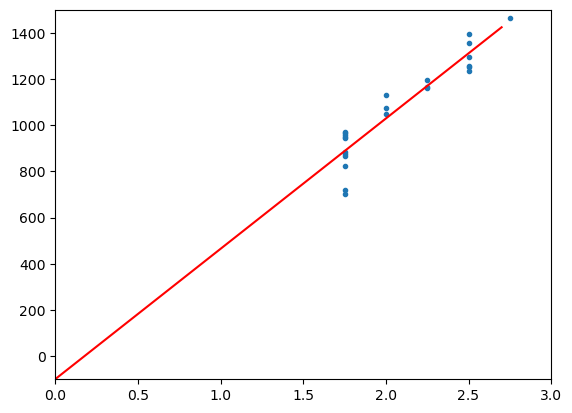

In [6]:
ind = np.arange(0,2.8,0.1)
plt.plot(X[:,1],y,'.')
plt.plot(ind, ind*weights[1]+weights[0],'r')
plt.axis([0, 3, -100, 1500])

<hr style="border:2px solid gray"> </hr>

### Linear Regression
Linear regression was carried out using the least squares method and matrix multiplication.



In [7]:
def dot_product(matrix_a, matrix_b):
    """
    AIM: This function carries out matrix multiplication using the dot product method.
    ARGUMENTS: Two matrices in the form of a list of lists or a numpy array of arrays.
    ACTION: Checks to see if the Matrices can be multiplied together. Then uses nested for loops
            to multiply the rows in matrix_a by the columns in matrix_b.
    RETURN: Returns a matrix that is the product of matrix_a and matrix_b.
    """

    # Checks that the columns in matrix_a are equal to the rows in matrix_b.
    # Throws a TypeError exception if they don't match. 
    # This is to keep with the rules of matrix multiplication. 
    if len(matrix_a[0]) != len(matrix_b):
        raise TypeError("The columns in matrix A must equal the rows in matrix B.")
    
    # This checks to see if matrix_b is a one-dimensional array.
    # This is to fix a bug where if b was a one-dimensional array
    # my code would crash when trying to call a two-dimensional element.
    matrix_b_is_two_dimensional = isinstance(matrix_b[0], np.ndarray) or isinstance(matrix_b[0], list)
    
    # List used to store final output.
    product = []
    
    # Nested for loop. 
    # Multiplies the rows in matrix_a by the columns in matrix_b using the dot product method.
    # To use this method the columns in matrix_a must match the rows in matrix_b.
    # This then results in a matrix with rows equal to matrix_a and columns equal to matrix_b.
    for row_in_a in matrix_a:
        row = []
        
        # The variable number_of_cols_in_b controls the range
        # for the loop below. If matrix_b is a one dimensional array this is set to one.
        if matrix_b_is_two_dimensional:
            number_of_cols_in_b = len(matrix_b[0])
        else:
            number_of_cols_in_b = 1
                        
        # 'i' is used to increment through the rows in matrix_b.
        # This is used to traverse down the columns in matrix_b.
        # If matrix_b is a one dimensional array this is set to 1.
        for i in range(number_of_cols_in_b):
            
            element = 0
            
            for j, row_in_b in enumerate(matrix_b):
                if matrix_b_is_two_dimensional:
                    element += row_in_b[i] * row_in_a[j]
                else:
                    element += row_in_b * row_in_a[j]
                    
                
            row.append(element)
        
        product.append(row)
        
    return np.asarray(product)
                       
    
    

In [8]:
def transpose(matrix):
    """
    AIM: Transposes matrix using the unzip method.
    ARGUMENTS: A matrix in the form of a list of lists or a numpy array of arrays.
    ACTION: Unzips matrix and maps it to a list.
    RETURNS: Transposed matrix.
    """
    
    transposed_matrix = []
    
    try:
        transposed_matrix = list(map(list,zip(*matrix)))
    except TypeError:
        transposed_matrix = matrix.copy()

            
    return np.asarray(transposed_matrix)

In [9]:
def inverse(matrix_a):
    """
    AIM: Calculates the Inverse of a 2x2 matrix.
    ARGUMENTS: A matrix in the form of a list of lists or a numpy array of arrays.
    ACTION: Calculates the inverse of a 2x2 matrix by swapping the position of a and d,
            and inverting the sign of b and c. This swapped matrix is then divided by its determinant
    """
    if len(matrix_a[0]) == 2 and len(matrix_a) == 2:
        a, b = matrix_a[0]
        c, d = matrix_a[1]

        determinant = (a * d) - (b * c)

        swapped_positions = [[d, b * (-1)], [c * (-1), a]]

        inverse_matrix = []
        for a, b in swapped_positions:
            a /= determinant
            b /= determinant
            inverse_matrix.append([a, b])

        return np.asarray(inverse_matrix)
    else:
        raise TypeError("This inverse method only accepts a 2x2 Matrix.")

In [10]:
def fit(X, Y):
    """
    AIM: Calculates the weight vector.
    ARGUMENTS: Two matrices X - list of ones and a list of the x values, Y - list of y values.
    ACTION: Uses the transpose, dot_product and inverse functions to execute the formula 
            weights = (X^T.X)^-1.X^T.Y. 
    RETURNS: The weight vector which represents the y-intercept and the slope of the line.
    """
#     # I broke this into steps to make it easier for myself to follow. 
#       I will leave them here to show how I broke down the equation.
#     # Transpose X
#     X_T = transpose(X)
    
#     # Dot X with the transpose of X.
#     X_T_dot_X = dot_product(X_T, X)
    
#     # Get the inverse 
#     inverse_X_T_dot_X = inverse(X_T_dot_X)
    
#     # Dot the inverse with X.
#     inverse_X_T_dot_X_dot_X = dot_product(inverse_X_T_dot_X, X_T)
    
#     # Dot the result of the previous function with Y.
#     inverse_X_T_dot_X_dot_X_dot_Y = dot_product(inverse_X_T_dot_X_dot_X, Y)

#   Transpose X
    X_T = transpose(X)
    
    return dot_product(dot_product(inverse(dot_product(X_T, X)), X_T), Y)

In [11]:
def predict(weights, X):
    """
    AIM: Predicts the outputs using the weighted vector.
    ARGUMENTS: Two matrices the weighted vector - representing the slope of the line and
               the y-intercept and X - list of ones and a list of the x values.
    ACTION: Uses the transpose function and the dot product to multiply the weighted vector with X. 
    RETURNS: Returns a list of predictions for X.
    """
    weights_transpose = transpose(weights)
    
    output = []
    
    for point in X:
        output.append(dot_product(weights_transpose, point)[0])
        
    return np.asarray(output)

In [12]:
def get_params(X, Y):
    """
    AIM: Returns the weight vector.
    ARGUMENTS: Two matrices X - list of ones and a list of the x values, Y - list of y values.
    ACTION: Uses the fit function to calculate the weighted vector.
    RETURNS: The weight vector as a string which represents the y-intercept and the slope of the line.
    """
    weights = fit(X,Y)
    y_intercept = weights[0][0]
    slope = weights[1][0]
    return f"The slope is {slope} and the y-intercept is {y_intercept}."
    

In [13]:
class LinearAlgebra(object):
    """
    A class to contain methods for linear algebra operations.
    
    Methods
    -------
    dot_product: Carries out matrix multiplication.
    transpose: transposes a matrix.
    inverse: returns the inverse of a 2x2 matrix.
    """
    
    def dot_product(self, matrix_a, matrix_b):
        """
        AIM: This function carries out matrix multiplication using the dot product method.
        ARGUMENTS: Two matrices in the form of a list of lists or a numpy array of arrays.
        ACTION: Checks to see if the Matrices can be multiplied together. Then uses nested for loops
                to multiply the rows in matrix_a by the columns in matrix_b.
        RETURN: Returns a matrix that is the product of matrix_a and matrix_b.
        """

        # Checks that the columns in matrix_a are equal to the rows in matrix_b.
        # Throws a TypeError exception if they don't match. 
        # This is to keep with the rules of matrix multiplication. 
        if len(matrix_a[0]) != len(matrix_b):
            raise TypeError("The columns in matrix A must equal the rows in matrix B.")

        # This checks to see if matrix_b is a one-dimensional array.
        # This is to fix a bug where if b was a one-dimensional array
        # my code would crash when trying to call a two-dimensional element.
        matrix_b_is_two_dimensional = isinstance(matrix_b[0], np.ndarray) or isinstance(matrix_b[0], list)

        # List used to store final output.
        product = []

        # Nested for loop. 
        # Multiplies the rows in matrix_a by the columns in matrix_b using the dot product method.
        # To use this method the columns in matrix_a must match the rows in matrix_b.
        # This then results in a matrix with rows equal to matrix_a and columns equal to matrix_b.
        for row_in_a in matrix_a:
            row = []

            # The variable number_of_cols_in_b controls the range
            # for the loop below. If matrix_b is a one dimensional array this is set to one.
            if matrix_b_is_two_dimensional:
                number_of_cols_in_b = len(matrix_b[0])
            else:
                number_of_cols_in_b = 1

            # 'i' is used to increment through the rows in matrix_b.
            # This is used to traverse down the columns in matrix_b.
            # If matrix_b is a one dimensional array this is set to 1.
            for i in range(number_of_cols_in_b):

                element = 0

                for j, row_in_b in enumerate(matrix_b):
                    if matrix_b_is_two_dimensional:
                        element += row_in_b[i] * row_in_a[j]
                    else:
                        element += row_in_b * row_in_a[j]


                row.append(element)

            product.append(row)

        return np.asarray(product)


    def transpose(self, matrix):
        """
        AIM: Transposes matrix using the unzip method.
        ARGUMENTS: A matrix in the form of a list of lists or a numpy array of arrays.
        ACTION: Unzips matrix and maps it to a list.
        RETURNS: Transposed matrix.
        """

        transposed_matrix = []

        try:
            transposed_matrix = list(map(list,zip(*matrix)))
        except TypeError:
            transposed_matrix = matrix.copy()


        return np.asarray(transposed_matrix)



    def inverse(self, matrix_a):
        """
        AIM: Calculates the Inverse of a 2x2 matrix.
        ARGUMENTS: A matrix in the form of a list of lists or a numpy array of arrays.
        ACTION: Calculates the inverse of a 2x2 matrix by swapping the position of a and d,
                and inverting the sign of b and c. This swapped matrix is then divided by its determinant
        """
        if len(matrix_a[0]) == 2 and len(matrix_a) == 2:
            a, b = matrix_a[0]
            c, d = matrix_a[1]

            determinant = (a * d) - (b * c)

            swapped_positions = [[d, b * (-1)], [c * (-1), a]]

            inverse_matrix = []
            for a, b in swapped_positions:
                a /= determinant
                b /= determinant
                inverse_matrix.append([a, b])

            return np.asarray(inverse_matrix)
        else:
            raise TypeError("This inverse method only accepts a 2x2 Matrix.")


    

In [14]:
class LinearRegression(LinearAlgebra):
    """
    A class to contain methods for linear regression using the least squares method.
    
    Attributes
    ---------
    X: list of ones and a list of the x values
    y: list of y values
    weights: weighted vector element 0 represents the y-intercept and element 1 represents
             the slope of the line.
    
    Methods
    -------
    get_params: Returns the y-intercept and the slope of the line, calculated in the fit function.
    fit: Calculates the weight vector based on attributes X and y.
    predict: Predicts the outputs using the weighted vector.
    """
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.weights = []
        
    def get_params(self):
        return self.weights
        
    
    def fit(self):
        """
        AIM: Calculates the weight vector based on attributes X and y.
        ARGUMENTS: self.
        ACTION: Uses methods inherited from the LinearAlgebra class
                transpose, dot_product and inverse functions to execute the formula 
                A = (X^T.X)^-1.X^T.Y. 
        RETURNS: The weight vector which represents the y-intercept and the slope of the line.
        """
        # I broke this into steps to make it easier for myself to follow.
        # Transpose X
        X_T = self.transpose(self.X)

#         # Dot X with the transpose of X.
#         X_T_dot_X = self.dot_product(X_T, self.X)

#         # Get the inverse 
#         inverse_X_T_dot_X = self.inverse(X_T_dot_X)

#         # Dot the inverse with X.
#         inverse_X_T_dot_X_dot_X = self.dot_product(inverse_X_T_dot_X, X_T)

#         # Dot the result of the previous function with Y.
#         inverse_X_T_dot_X_dot_X_dot_Y = self.dot_product(inverse_X_T_dot_X_dot_X, self.y)
        
        self.weights = dot_product(dot_product(inverse(dot_product(X_T, X)), X_T), self.y)

        return self.weights
        
    
    def predict(self):
        """
        AIM: Predicts the outputs using the weighted vector.
        ARGUMENTS: self.
        ACTION: Uses methods inherited from the LinearAlgebra class transpose and the dot product to multiply 
                the weighted vector with X. 
        RETURNS: Returns a list of predictions for X.
        """
        weights_transpose = transpose(self.weights)

        output = []

        for point in self.X:
            output.append(self.dot_product(weights_transpose, point)[0])

        return np.asarray(output)

    

In [15]:
# Create an object of type LinearAlgebra to use in testing.
linear_algebra = LinearAlgebra()
linear_regression = LinearRegression(X, y)

### Test 1 : dot_product

Matrix A:<br>
[1, 2, 3]<br>
[1, 2, 3]<br>
           
Matrix B:<br>
[1, 2, 3]<br>
[1, 2, 3]<br> 
[1, 2, 3]<br>
           
Calculation:<br> 
[ $(1*1 + 1*2 + 1*3) $, $(2*1 + 2*2 + 2*3)$, $(3*1 + 3*2 + 3*3)$]<br>
[ $(1*1 + 1*2 + 1*3)$, $(2*1 + 2*2 + 2*3)$, $(3*1 + 3*2 + 3*3)$]<br>

Result:<br>
[6, 12, 18]<br>
[6, 12, 18]<br>
                

In [16]:
test_matrix_1 = [[1, 2, 3], [1, 2, 3]]
test_matrix_2 = [[1, 2, 3], [1, 2, 3], [1, 2, 3]]
test = dot_product(test_matrix_1, test_matrix_2)
print(test)

[[ 6 12 18]
 [ 6 12 18]]


In [17]:
# The same test carried out using the LinearAlgebra class
test = linear_algebra.dot_product(test_matrix_1, test_matrix_2)
print(test)

[[ 6 12 18]
 [ 6 12 18]]


### Test 2: dot_product

Matrix A:<br>
[1, 2, 3]<br>
[1, 2, 3]<br> 
[1, 2, 3]<br>

Matrix B:<br>
[1, 2, 3]<br>
[1, 2, 3]<br>

Calculation: This multiplies a 3x3 matrix with a 2x3 matrix as the columns in A don't match<br> 
the rows in B this will cause a TypeError exception.

In [18]:
test_matrix_1 = [[1, 2, 3], [1, 2, 3]]
test_matrix_2 = [[1, 2, 3], [1, 2, 3], [1, 2, 3]]

try:
    test = dot_product(test_matrix_2, test_matrix_1)
except TypeError as error:
    print(error)

The columns in matrix A must equal the rows in matrix B.


In [19]:
# The same test carried out using the LinearAlgebra class
try:
    test = linear_algebra.dot_product(test_matrix_2, test_matrix_1)
except TypeError as error:
    print(error)

The columns in matrix A must equal the rows in matrix B.


### Test 3: dot_product

This test compares the result of the transpose of X doted with X using<br>
Numpy methods and using my own function.

In [20]:
test_reference = X.T.dot(X)
test = dot_product(X.T, X)
la_class_test = linear_algebra.dot_product(X.T, X)

print("Using dot_product function:\n", test, "\n")
print("Using LinearAlgebra class:\n", la_class_test, "\n")
print("Using Numpy methods:\n", test_reference)

Using dot_product function:
 [[ 24.      49.75  ]
 [ 49.75   105.9375]] 

Using LinearAlgebra class:
 [[ 24.      49.75  ]
 [ 49.75   105.9375]] 

Using Numpy methods:
 [[ 24.      49.75  ]
 [ 49.75   105.9375]]


### Test 4: Transpose

This test compares the result of the transpose of X using<br>
Numpy methods and using my own function.

In [21]:
print("Using transpose function:\n", transpose(X), "\n")
print("Using LinearAlgebra class:\n", linear_algebra.transpose(X), "\n")
print("Using Numpy methods:\n", X.T)

Using transpose function:
 [[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]
 [2.75 2.5  2.5  2.5  2.5  2.5  2.5  2.25 2.25 2.25 2.   2.   2.   1.75
  1.75 1.75 1.75 1.75 1.75 1.75 1.75 1.75 1.75 1.75]] 

Using LinearAlgebra class:
 [[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]
 [2.75 2.5  2.5  2.5  2.5  2.5  2.5  2.25 2.25 2.25 2.   2.   2.   1.75
  1.75 1.75 1.75 1.75 1.75 1.75 1.75 1.75 1.75 1.75]] 

Using Numpy methods:
 [[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]
 [2.75 2.5  2.5  2.5  2.5  2.5  2.5  2.25 2.25 2.25 2.   2.   2.   1.75
  1.75 1.75 1.75 1.75 1.75 1.75 1.75 1.75 1.75 1.75]]


### Test 5: inverse

This test compares the result of the inverse of X transpose dotted with X using<br>
Numpy methods and using my own function.

In [22]:
reference_output = np.linalg.inv((X.T.dot(X)))
three_by_three_matrix = [[1,2,3],[1,2,3],[1,2,3]]

print("Using inverse function:\n", inverse(X.T.dot(X)), "\n")
print("Using LinearAlgebra class:\n", linear_algebra.inverse(X.T.dot(X)), "\n")
print("Using Numpy methods:\n", reference_output)
try:
    print("The inverse of a 3x3 matrix:", linear_algebra.inverse(three_by_three_matrix))
except TypeError as error:
    print("\n\nThere was an error:", error)

Using inverse function:
 [[ 1.57089898 -0.73772011]
 [-0.73772011  0.35588508]] 

Using LinearAlgebra class:
 [[ 1.57089898 -0.73772011]
 [-0.73772011  0.35588508]] 

Using Numpy methods:
 [[ 1.57089898 -0.73772011]
 [-0.73772011  0.35588508]]


There was an error: This inverse method only accepts a 2x2 Matrix.


### Test 6: fit

This test compares the result of the linreg_weights function which uses<br>
Numpy methods and using my own function.

In [23]:
reference_output =  linreg_weights(X,y)
my_output = fit(X, y)

print("Using fit function:\n", my_output, "\n")
print("Using linear_regression class:\n", linear_regression.fit(), "\n")
print("Using Numpy methods:\n", reference_output)

Using fit function:
 [[-99.46431881]
 [564.20389249]] 

Using linear_regression class:
 [[-99.46431881]
 [564.20389249]] 

Using Numpy methods:
 [[-99.46431881]
 [564.20389249]]


### Test 7: predict

This test compares the result of the linreg_predict function which uses<br>
Numpy methods and using my own function.

In [24]:
reference_output = linreg_predict(weights, X)
my_output = predict(weights, X)

print("Using fit function:\n", my_output, "\n")
print("Using linear_regression class:\n", linear_regression.predict(), "\n")
print("Using Numpy methods:\n", reference_output)

Using fit function:
 [[1452.09638554]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1169.9944393 ]
 [1169.9944393 ]
 [1169.9944393 ]
 [1028.94346617]
 [1028.94346617]
 [1028.94346617]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]] 

Using linear_regression class:
 [[1452.09638554]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1169.9944393 ]
 [1169.9944393 ]
 [1169.9944393 ]
 [1028.94346617]
 [1028.94346617]
 [1028.94346617]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]] 

Using Numpy methods:
 [[1452.09638554]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 

In [26]:
type(my_output)

numpy.ndarray

### Test 8: get_params

Prints the weighted vector as a string.

In [25]:
test = get_params(X, y)
print(test)
print(linear_regression.get_params())

The slope is 564.2038924930501 and the y-intercept is -99.4643188137135.
[[-99.46431881]
 [564.20389249]]


<hr style="border:2px solid gray"> </hr>

## Reflection

The aim of task 1 was to write a set of functions that could be used to perform a linear regression on a set of data provided for the task. The linear regression would be implemented using the method of least squares. This is a method of plotting a line of best fit through a set of coordinates on an x-y axis.  
To complete this task, several functions needed to be created. This included functions to carry out the linear regression itself and matrix algebra functions to carry out calculations for this.
When these functions were completed, an additional task was given to encapsulate them in a class. This was to make the code more portable so that it could be used as a package in future projects, give us practice writing, and use object-oriented programming. 
#### Matrix Algebra Functions
**Dot_product:** This function multiplies two matrices together using the dot product method. This is where when matrix A and matrix B are multiplied together, each column in matrix B is multiplied by each row in matrix A. For matrices to be multiplied, the columns in matrix A must equal the rows in matrix B. The resulting matrix has the same number of rows as matrix A and the same number of columns as matrix B. In this function, if the columns in matrix A didn’t equal the rows in matrix B then an exception was raised. The matrices were then multiplied together using a series of nested for loops. The resulting matrix was returned as a NumPy array.<br><br>
**Transpose:** In matrix algebra, transposing a matrix involves altering a matrix so that the values represented as a row are then represented as a column. 
This was executed using a method learned in the secondary material for this course. It involved using the unzip method (*zip) the output of this method was mapped as a list and then combined as a list using the list function. This method failed if a single-dimensional list was passed to the function. Error handling was put in place to deal with this.
**Inverse:** A method to calculate the inverse of a two-by-two matrix was carried out using the following equation:<br>
	$1/(ad-bc) * [[d,  -b], [-c, a]]$<br><br>
This method only works on a two-by-two matrix. Error handling was added to ensure that if a larger matrix were entered, it would raise an exception.<br><br>
**Linear regression methods**<br>
**Fit:** This function was used to calculate the y-intercept and the slope of the line of best fit. This could then be used to plot that line. These points were calculated using the equation:<br>
	$weights = (X^T.X)^{-1}.X^T.Y$<br>
The function was executed by first breaking it into more manageable parts and carrying out calculations using the matrix algebra functions that were also created for this task. The output of this function was the weights vector representing the y-intercept and the slope of the line of best fit.<br><br>
**Predict:** The predict function predicts the output for X based on the weighted vector. It takes two matrices the weighted vector - representing the slope of the line and the y-intercept, and X - list of ones and a list of the x values. Uses the transpose function and the dot product to multiply the weighted vector with X. Returns a list of predictions for X.
**Get_params:** The get_params function returns the weighted vector. This format isn’t particularly useful, and this function becomes more valuable when implemented as part of a class.<br><br>
**Object Orientation**<br>
These functions were then to be encapsulated into a class. I split the functions into two different classes. A MatrixAlgebra class contains the functions dot_product, transpose, and inverse, and a LinearRegression class. The LinearRegression class is a subclass of the MatrixAlgebra class. This was done so that the LinearAlgebra class could use all the methods of the Matrix algebra class internally. I decided to keep the classes separate as I felt that the MatrixAlgebra functions have the potential to be used in other classes separate from Linear regression.<br>
**Testing**<br>
Testing for this task was carried out by comparing the output of my functions to the output of the NumPy functions given as an example at the start of the task. Some tests were also carried out against dummy values which I created.<br>
**Disadvantages:**<br>
The most significant disadvantage I can see in this code is the number of for loops that my implementation requires to carry my dot_product function. This method would exponentially add operations to the function depending on the size of the matrix, and it would be very slow operating on a large data set.
